# Dangue Fever Hematological EDA | ML

# Importing the libraries

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, confusion_matrix, precision_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier


## Importing the dataset

In [2]:
# Load Data
Dengue_data = pd.read_csv('Dengue-Dataset.csv')

In [3]:
# View First
Dengue_data.head()

,Gender,Age,Hemoglobin(g/dl),Neutrophils(%),Lymphocytes(%),Monocytes(%),Eosinophils(%),RBC,HCT(%),MCV(fl),MCH(pg),MCHC(g/dl),RDW-CV(%),Total Platelet Count(/cumm),MPV(fl),PDW(%),PCT(%),Total WBC count(/cumm),Result
0,Male,21,14.8,48,47,3,2,5,48.00,96.0,29.60,30.8,11.6,112000,10.70,15.40,0.120,5100,positive
1,Male,30,15.0,47,49,6,3,5,49.80,96.1,28.40,29.5,11.8,96000,10.60,15.80,0.121,4500,positive
2,Male,51,16.3,41,48,4,5,5,50.10,93.5,31.30,32.7,13.5,184000,10.40,16.40,0.130,6000,negative
3,Female,26,12.3,46,49,7,5,5,44.00,90.0,30.50,30.5,14.7,167000,8.10,17.10,0.110,5000,negative
4,Male,35,16.1,45,46,4,4,5,50.53,91.0,29.12,29.2,15.2,155000,10.52,12.34,0.150,4600,negative


In [4]:
# And Last Row
Dengue_data.tail()

,Gender,Age,Hemoglobin(g/dl),Neutrophils(%),Lymphocytes(%),Monocytes(%),Eosinophils(%),RBC,HCT(%),MCV(fl),MCH(pg),MCHC(g/dl),RDW-CV(%),Total Platelet Count(/cumm),MPV(fl),PDW(%),PCT(%),Total WBC count(/cumm),Result
1518,Female,54,17.2,41,48,3,3,5,41.97,87.9,26.6,30.1,12.3,95231,9.67,17.66,0.102,6698,positive
1519,Male,23,16.8,47,40,4,3,4,38.00,99.2,32.6,33.6,14.7,167385,10.36,17.47,0.176,5694,positive
1520,Male,24,15.9,46,46,2,4,4,39.78,88.3,29.9,34.2,12.1,121163,8.94,13.95,0.136,5010,positive
1521,Male,49,13.2,41,49,2,3,5,51.07,92.0,32.8,32.0,15.0,201880,8.25,14.72,0.174,5767,positive
1522,Male,49,13.2,41,44,2,3,5,50.14,94.2,30.8,32.2,13.7,242748,9.39,16.07,0.140,6124,positive


In [5]:
# Shape of Data
Dengue_data.shape

(1523, 19)

In [6]:
# Get a summary of the data types and missing values
Dengue_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       1523 non-null   object 
 1   Age                          1523 non-null   int64  
 2   Hemoglobin(g/dl)             1523 non-null   float64
 3   Neutrophils(%)               1523 non-null   int64  
 4   Lymphocytes(%)               1523 non-null   int64  
 5   Monocytes(%)                 1523 non-null   int64  
 6   Eosinophils(%)               1523 non-null   int64  
 7   RBC                          1523 non-null   int64  
 8   HCT(%)                       1523 non-null   float64
 9   MCV(fl)                      1523 non-null   float64
 10  MCH(pg)                      1523 non-null   float64
 11  MCHC(g/dl)                   1523 non-null   float64
 12  RDW-CV(%)                    1523 non-null   float64
 13  Total Platelet Cou

# Data Cleaning

In [7]:
# Check for missing values and drop rows with missing values
Dengue_data.isnull().sum()

Gender                         0
Age                            0
Hemoglobin(g/dl)               0
Neutrophils(%)                 0
Lymphocytes(%)                 0
Monocytes(%)                   0
Eosinophils(%)                 0
RBC                            0
HCT(%)                         0
MCV(fl)                        0
MCH(pg)                        0
MCHC(g/dl)                     0
RDW-CV(%)                      0
Total Platelet Count(/cumm)    0
MPV(fl)                        0
PDW(%)                         0
PCT(%)                         0
Total WBC count(/cumm)         0
Result                         0
dtype: int64

In [8]:
# Remove missing values (if any)
Dengue_data = Dengue_data.dropna()

In [9]:
# Check for duplicate rows
print("Number of duplicate rows:", Dengue_data.duplicated().sum())

# Drop duplicate rows
Dengue_data = Dengue_data.drop_duplicates()

# Verify the removal of duplicates
print("Number of rows after dropping duplicates:", len(Dengue_data))

Number of duplicate rows: 12
Number of rows after dropping duplicates: 1511


# Exploratory Data Analysis (EDA)

In [10]:
# Display descriptive statistics
Dengue_data.describe()

,Age,Hemoglobin(g/dl),Neutrophils(%),Lymphocytes(%),Monocytes(%),Eosinophils(%),RBC,HCT(%),MCV(fl),MCH(pg),MCHC(g/dl),RDW-CV(%),Total Platelet Count(/cumm),MPV(fl),PDW(%),PCT(%),Total WBC count(/cumm)
count,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000
mean,40.380543,14.511203,44.508273,43.578425,3.273329,3.082065,4.761085,45.187890,89.810788,29.898757,32.058437,13.626704,173326.062872,9.585275,15.314801,0.290684,5485.471211
std,15.286972,1.629524,4.312130,4.946365,1.212003,0.997289,0.721822,3.578648,5.523165,2.030847,1.549673,1.431335,64859.144407,0.848695,1.409171,6.016601,1139.668604
min,5.000000,10.400000,29.000000,29.000000,2.000000,1.000000,4.000000,36.300000,80.000000,22.900000,27.080000,11.000000,56000.000000,7.500000,8.400000,0.000020,3500.000000
25%,28.000000,13.200000,42.000000,41.000000,2.000000,2.000000,4.000000,42.560000,85.100000,28.400000,30.900000,12.400000,115000.000000,8.900000,14.220000,0.107000,4627.500000
50%,39.000000,14.600000,45.000000,44.000000,3.000000,3.000000,5.000000,45.550000,89.700000,30.000000,32.000000,13.800000,167409.000000,9.660000,15.270000,0.141000,5400.000000
75%,53.000000,15.800000,48.000000,47.000000,4.000000,4.000000,5.000000,47.865000,94.200000,31.400000,33.200000,14.700000,228703.500000,10.280000,16.415000,0.173500,6134.000000
max,78.000000,17.500000,60.000000,56.000000,9.000000,9.000000,7.000000,51.980000,100.000000,34.000000,35.000000,21.330000,299803.000000,11.235000,17.990000,234.000000,14900.000000


### Age Distribution

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


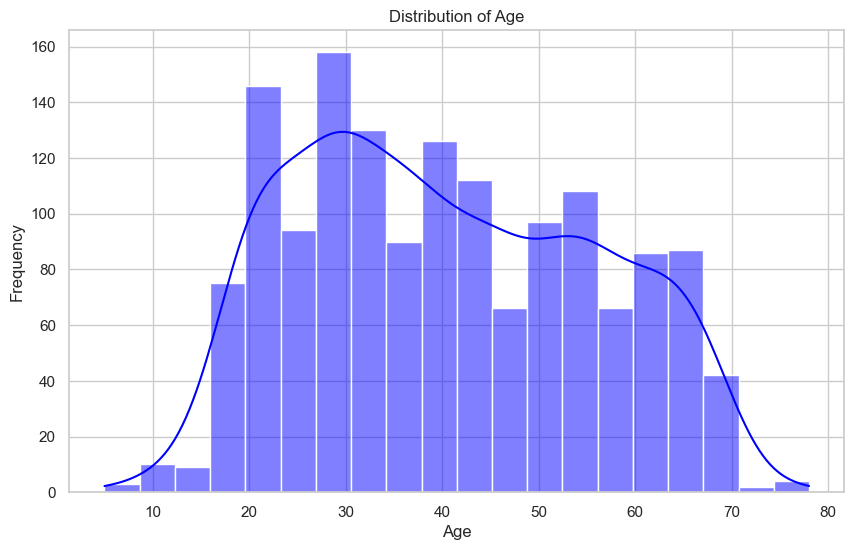

In [11]:
# Set style for the plots
sns.set(style="whitegrid")

# Plot the distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data=Dengue_data, x='Age', kde=True, bins=20, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Boxplot of The Numerical Columns

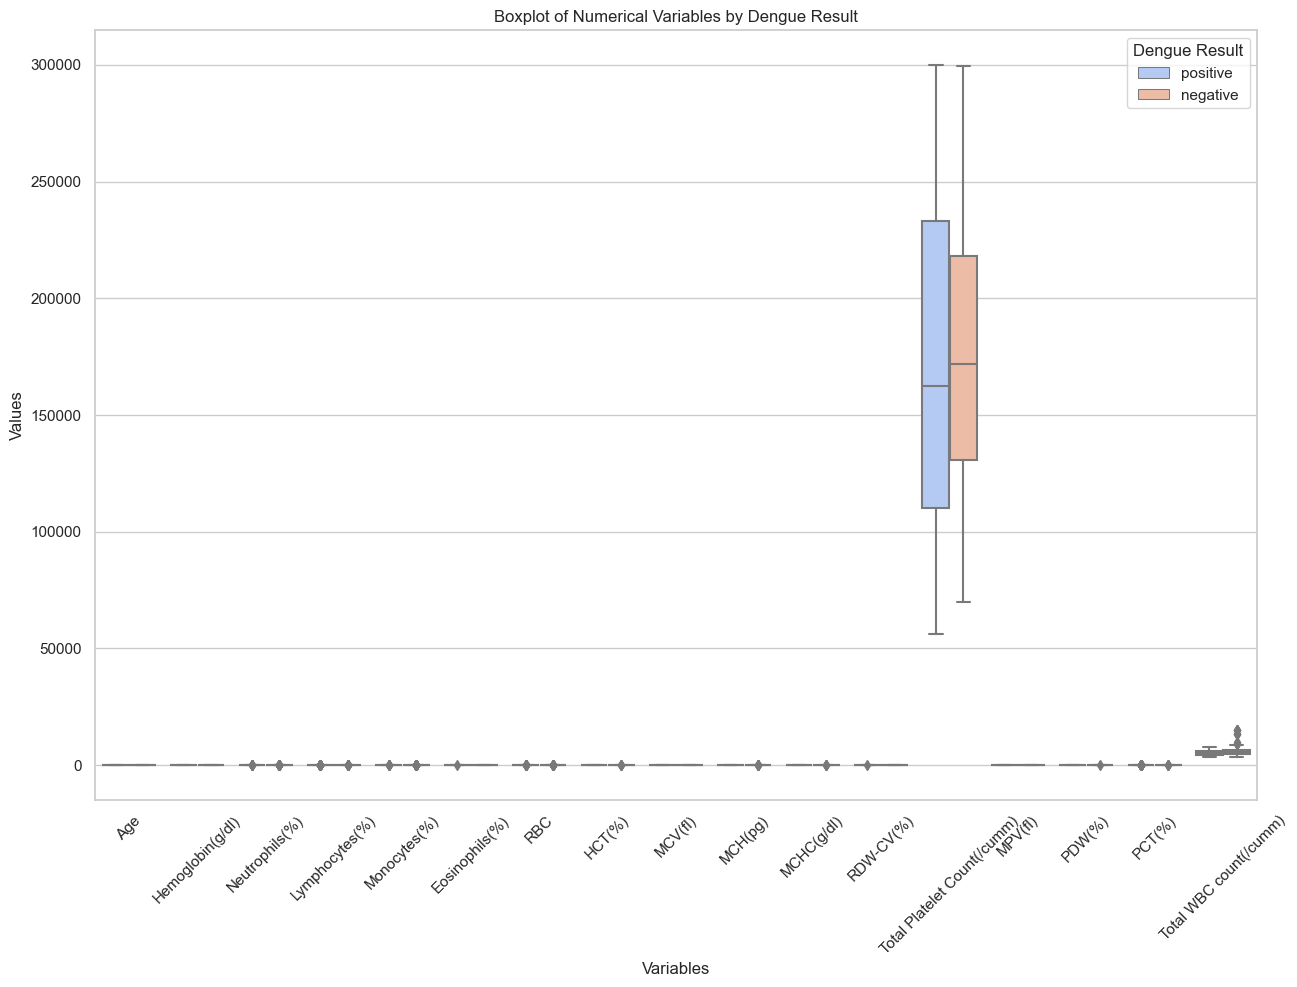

In [12]:
# Extract numerical columns
numerical_columns = Dengue_data.select_dtypes(include=['float64', 'int64']).columns

# Set plot style
sns.set(style="whitegrid")

# Plot boxplots for each numerical variable
plt.figure(figsize=(15, 10))
dengue_data_melted = Dengue_data.melt(id_vars=['Result'], value_vars=numerical_columns)
sns.boxplot(data=dengue_data_melted, x='variable', y='value', hue='Result', palette='coolwarm')
plt.title('Boxplot of Numerical Variables by Dengue Result')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend(title='Dengue Result', loc='upper right')
plt.show()

### Distribution of The Dependent Variable

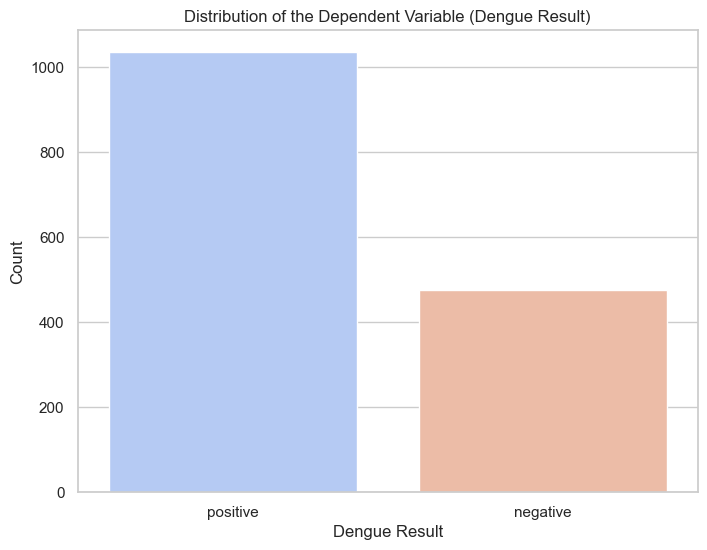


Counts for each class in the dependent variable:

Result
positive    1035
negative     476
Name: count, dtype: int64

Percentages for each class in the dependent variable:

Result
positive    68.497684
negative    31.502316
Name: proportion, dtype: float64


In [13]:
# Count plot for the dependent variable (Result)
plt.figure(figsize=(8, 6))
sns.countplot(data=Dengue_data, x='Result', palette='coolwarm')
plt.title('Distribution of the Dependent Variable (Dengue Result)')
plt.xlabel('Dengue Result')
plt.ylabel('Count')
plt.show()

# Print counts for each class
result_counts = Dengue_data['Result'].value_counts()
print("\nCounts for each class in the dependent variable:\n")
print(result_counts)

# Calculate percentages
result_percentages = Dengue_data['Result'].value_counts(normalize=True) * 100
print("\nPercentages for each class in the dependent variable:\n")
print(result_percentages)

### Create An Age_Group

In [14]:
# Define age bins and labels
bins = [0, 12, 19, 35, 50, 100]  # Age ranges
labels = ['Child (0-12)', 'Teenager (13-19)', 'Young Adult (20-35)', 'Adult (36-50)', 'Senior (>50)']

# Add Age_Group column
Dengue_data['Age_Group'] = pd.cut(Dengue_data['Age'], bins=bins, labels=labels, right=False)

# Display the first few rows to verify
print(Dengue_data[['Age', 'Age_Group']].head())

   Age            Age_Group
0   21  Young Adult (20-35)
1   30  Young Adult (20-35)
2   51         Senior (>50)
3   26  Young Adult (20-35)
4   35        Adult (36-50)


### Visualization : Age_Group and Result

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


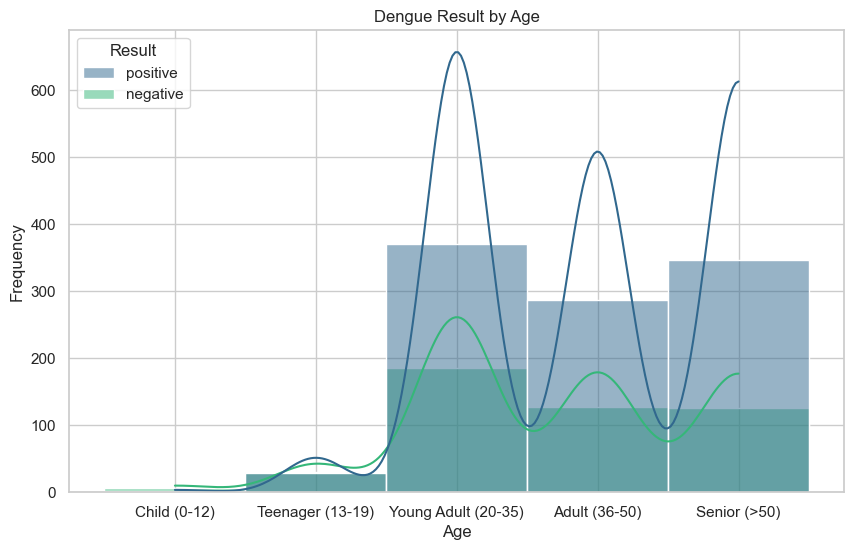

In [15]:
# Result by Age_Group
plt.figure(figsize=(10, 6))
sns.histplot(data=Dengue_data, x='Age_Group', hue='Result', kde=True, bins=20, palette='viridis')
plt.title('Dengue Result by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Visualization : Total Positive Cases by Gender

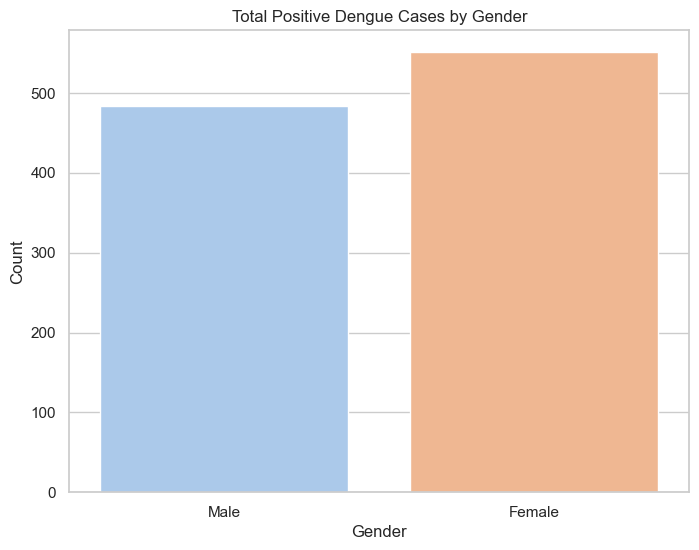

In [16]:
# Total Positive Cases by Gender
plt.figure(figsize=(8, 6))
positive_cases = Dengue_data[Dengue_data['Result'] == 'positive']
sns.countplot(data=positive_cases, x='Gender', palette='pastel')
plt.title('Total Positive Dengue Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### Visualization : Positive Cases by Age Group

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


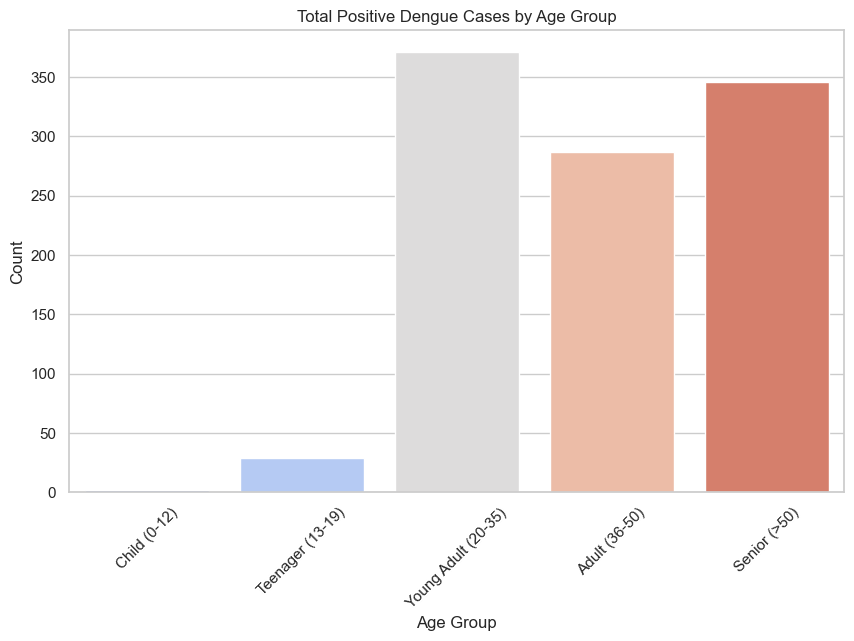

In [17]:
# Total Positive Cases by Age Group
plt.figure(figsize=(10, 6))
sns.countplot(data=positive_cases, x='Age_Group', order=labels, palette='coolwarm')
plt.title('Total Positive Dengue Cases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


## Visualization : Negative Cases by Age Group

/var/folders/s6/v6j1yxz12hs_sntlnv4301100000gn/T/ipykernel_18946/1559141833.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  negative_age_group = negative_cases.groupby('Age_Group')['Result'].count()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


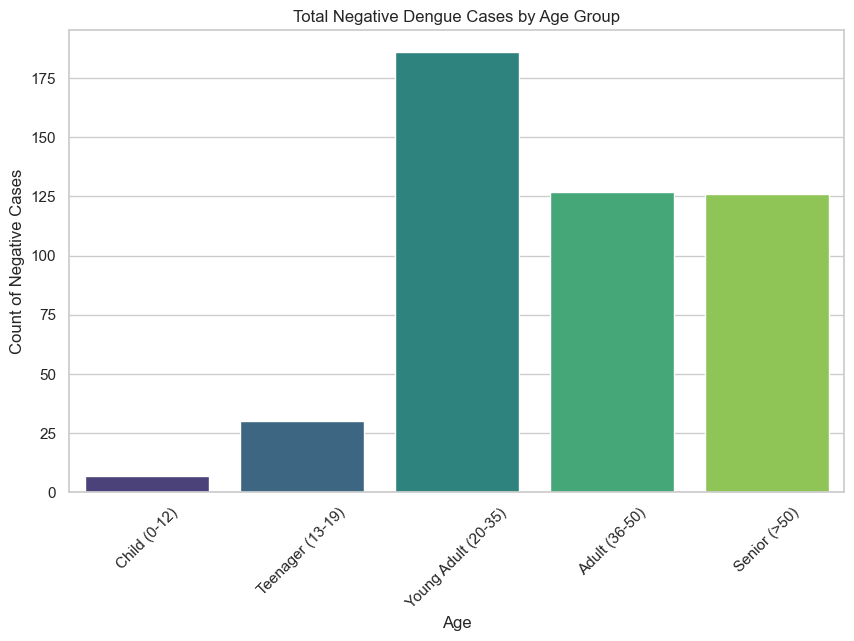

In [18]:
# Filter rows where 'Result' is 'negative'
negative_cases = Dengue_data[Dengue_data['Result'] == 'negative']

# Group by 'Age Group' (or 'Age' if Age_Group is not available)
negative_age_group = negative_cases.groupby('Age_Group')['Result'].count()

# Plot Total Negative Cases by Age Group
plt.figure(figsize=(10, 6))
sns.barplot(x=negative_age_group.index, y=negative_age_group.values, palette='viridis')
plt.title('Total Negative Dengue Cases by Age Group')
plt.xlabel('Age')
plt.ylabel('Count of Negative Cases')
plt.xticks(rotation=45)
plt.show()


## Visualization : Hemoglobin levels by Gender and Result

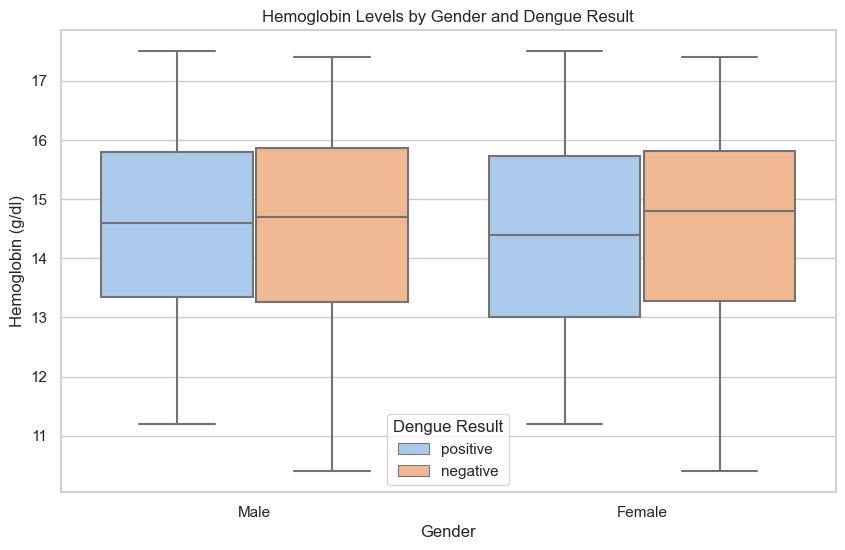

In [19]:
# Visualization : Boxplot for Hemoglobin levels by Gender and Result
plt.figure(figsize=(10, 6))
sns.boxplot(data=Dengue_data, x='Gender', y='Hemoglobin(g/dl)', hue='Result', palette='pastel')
plt.title('Hemoglobin Levels by Gender and Dengue Result')
plt.xlabel('Gender')
plt.ylabel('Hemoglobin (g/dl)')
plt.legend(title='Dengue Result')
plt.show()

## Visualization : Neutrophils vs Lymphocytes by Result

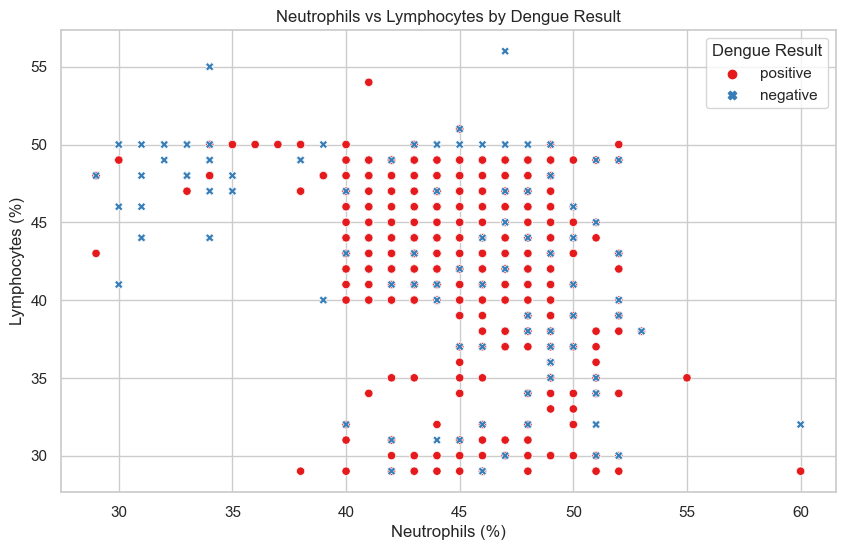

In [20]:
# Visualization : Scatterplot of Neutrophils vs Lymphocytes by Result
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Dengue_data, x='Neutrophils(%)', y='Lymphocytes(%)', hue='Result', style='Result', palette='Set1')
plt.title('Neutrophils vs Lymphocytes by Dengue Result')
plt.xlabel('Neutrophils (%)')
plt.ylabel('Lymphocytes (%)')
plt.legend(title='Dengue Result')
plt.show()

## Visualization : Boxplot for Total Platelet Count by Result

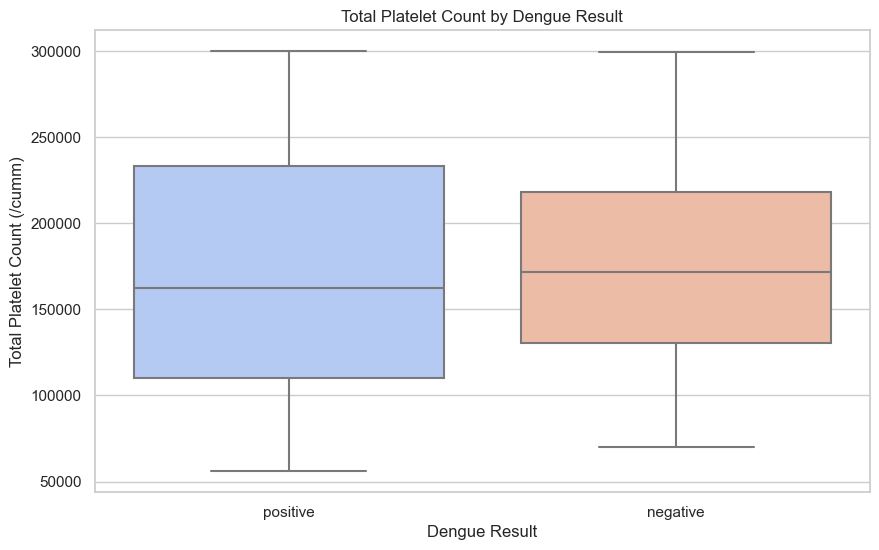

In [21]:
# Visualization : Boxplot for Total Platelet Count by Result
plt.figure(figsize=(10, 6))
sns.boxplot(data=Dengue_data, x='Result', y='Total Platelet Count(/cumm)', palette='coolwarm')
plt.title('Total Platelet Count by Dengue Result')
plt.xlabel('Dengue Result')
plt.ylabel('Total Platelet Count (/cumm)')
plt.show()

## Visualization : Boxplot platelet count by age group

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


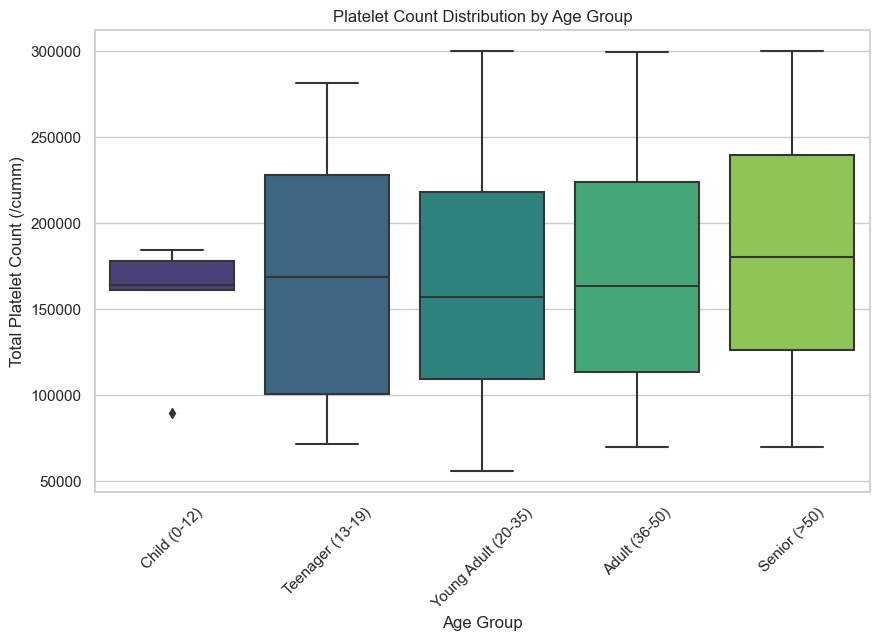


Summary Statistics for Platelet Count by Age Group:

                     count           mean           std      min        25%  \
Age_Group                                                                     
Child (0-12)           9.0  161844.444444  28522.715119  90000.0  161000.00   
Teenager (13-19)      59.0  166841.745763  64986.278600  72000.0  100700.00   
Young Adult (20-35)  557.0  167116.766607  64350.985841  56000.0  109328.00   
Adult (36-50)        414.0  170920.734300  64030.013546  70000.0  113430.75   
Senior (>50)         472.0  183792.786017  65581.996566  70000.0  126327.00   

                          50%        75%       max  
Age_Group                                           
Child (0-12)         164000.0  178000.00  184300.0  
Teenager (13-19)     168578.0  228000.00  281279.0  
Young Adult (20-35)  157015.0  218039.00  299803.0  
Adult (36-50)        163475.5  223888.50  299378.0  
Senior (>50)         180513.5  239390.25  299747.0  


/var/folders/s6/v6j1yxz12hs_sntlnv4301100000gn/T/ipykernel_18946/3769098860.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  platelet_stats = Dengue_data.groupby('Age_Group')['Total Platelet Count(/cumm)'].describe()


In [22]:
# Set plot style
sns.set(style="whitegrid")

# Boxplot to analyze platelet count by age group
plt.figure(figsize=(10, 6))
sns.boxplot(data=Dengue_data, x='Age_Group', y='Total Platelet Count(/cumm)', palette='viridis')
plt.title('Platelet Count Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Platelet Count (/cumm)')
plt.xticks(rotation=45)
plt.show()

# Summary statistics for platelet count by age group
platelet_stats = Dengue_data.groupby('Age_Group')['Total Platelet Count(/cumm)'].describe()
print("\nSummary Statistics for Platelet Count by Age Group:\n")
print(platelet_stats)

## Correlation Analysis

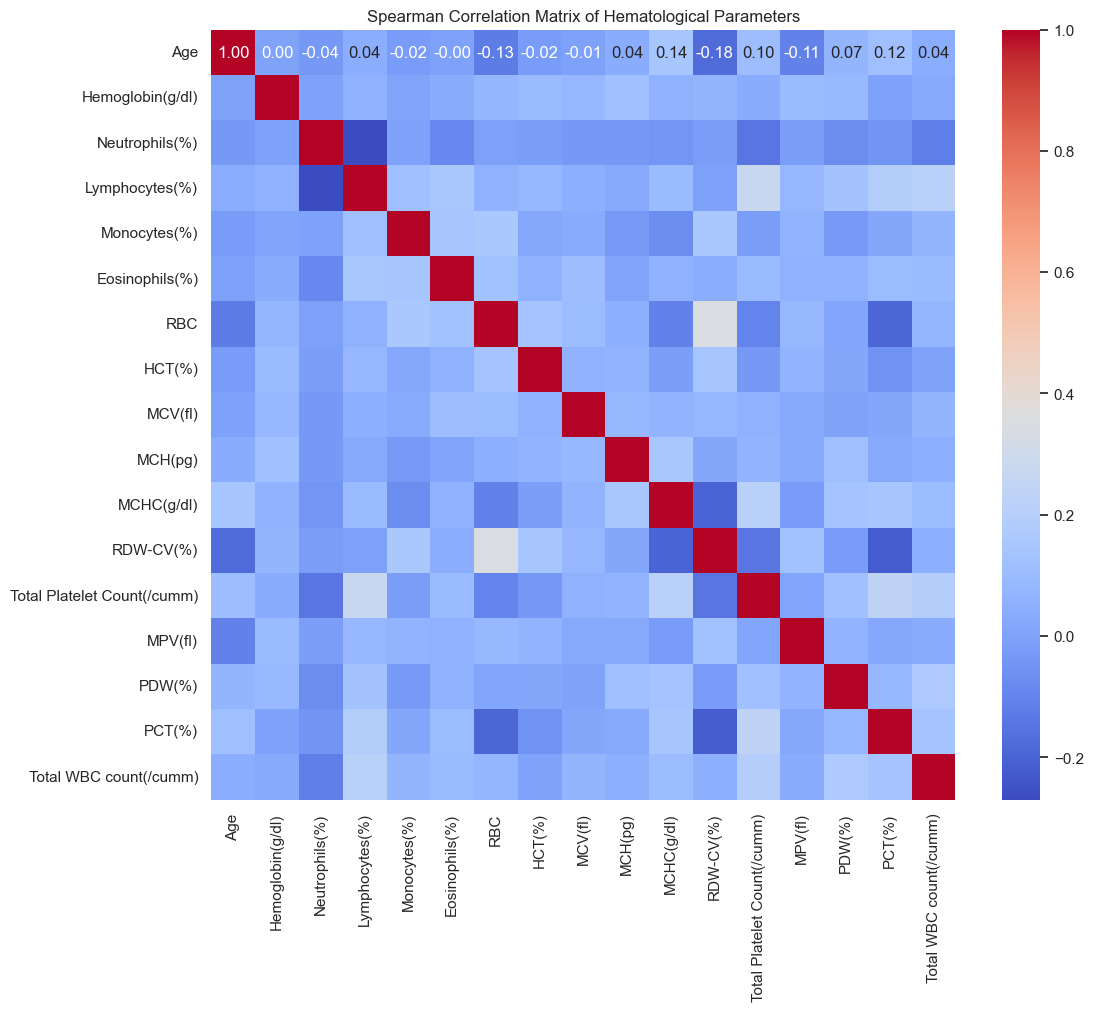

In [23]:
# Compute Spearman correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = Dengue_data.drop(columns=['Result', 'Gender', 'Age_Group']).corr(method='spearman')

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Spearman Correlation Matrix of Hematological Parameters')
plt.show()

# One-Hot Encoding for categorical features

In [24]:
# Encode 'Gender' as numeric
gender_encoder = LabelEncoder()
Dengue_data['Gender'] = gender_encoder.fit_transform(Dengue_data['Gender'])


## Encoding the Dependent Variable 

In [25]:
# Ensure target variable is encoded properly
Dengue_data['Result'] = Dengue_data['Result'].map({'positive': 1, 'negative': 0})


In [26]:
Dengue_data.head()

,Gender,Age,Hemoglobin(g/dl),Neutrophils(%),Lymphocytes(%),Monocytes(%),Eosinophils(%),RBC,HCT(%),MCV(fl),MCH(pg),MCHC(g/dl),RDW-CV(%),Total Platelet Count(/cumm),MPV(fl),PDW(%),PCT(%),Total WBC count(/cumm),Result,Age_Group
0,1,21,14.8,48,47,3,2,5,48.00,96.0,29.60,30.8,11.6,112000,10.70,15.40,0.120,5100,1,Young Adult (20-35)
1,1,30,15.0,47,49,6,3,5,49.80,96.1,28.40,29.5,11.8,96000,10.60,15.80,0.121,4500,1,Young Adult (20-35)
2,1,51,16.3,41,48,4,5,5,50.10,93.5,31.30,32.7,13.5,184000,10.40,16.40,0.130,6000,0,Senior (>50)
3,0,26,12.3,46,49,7,5,5,44.00,90.0,30.50,30.5,14.7,167000,8.10,17.10,0.110,5000,0,Young Adult (20-35)
4,1,35,16.1,45,46,4,4,5,50.53,91.0,29.12,29.2,15.2,155000,10.52,12.34,0.150,4600,0,Adult (36-50)


## Separate Dependent Variables and Independent Variable

In [27]:
# Select features and target variable
X = Dengue_data.drop(columns=['Result', 'Age_Group'])
y = Dengue_data['Result']

# Normalization 

In [28]:
# Scaled numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
print(X_scaled)

[[ 1.05933517 -1.26820138  0.17728661 ...  0.06048005 -0.02837825
  -0.33834294]
 [ 1.05933517 -0.67926986  0.30006251 ...  0.34442882 -0.02821199
  -0.86498607]
 [ 1.05933517  0.69490368  1.09810584 ...  0.77035197 -0.02671563
   0.45162175]
 ...
 [ 1.05933517 -1.07189087  0.85255405 ... -0.96883423 -0.02571806
  -0.41733941]
 [ 1.05933517  0.56403001 -0.80492057 ... -0.42223285 -0.01940011
   0.24710867]
 [ 1.05933517  0.56403001 -0.80492057 ...  0.53609424 -0.02505301
   0.56046134]]


# Split Train and Test

In [30]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

## Random Forest Model

In [31]:
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
# Predictions
y_pred = model.predict(X_test)

In [33]:
# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[ 32  63]
 [ 11 197]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.34      0.46        95
           1       0.76      0.95      0.84       208

    accuracy                           0.76       303
   macro avg       0.75      0.64      0.65       303
weighted avg       0.75      0.76      0.72       303


Accuracy Score: 0.7557755775577558


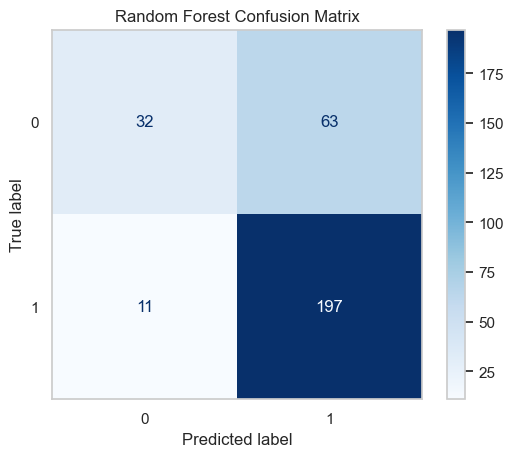

In [34]:
# Displaying the confusion matrix for visualization
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1]).plot(cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.grid(False)
plt.show()

## XGBoost Model

In [35]:
# Initialize and train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [19:17:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [36]:
# Predict on test data
y_predXG = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

In [37]:
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predXG))
print("\nClassification Report:\n", classification_report(y_test, y_predXG))
print("\nAccuracy Score:", accuracy_score(y_test, y_predXG))
print("\nAUC-ROC Score:", roc_auc_score(y_test, y_pred_proba))

Confusion Matrix:
 [[ 36  59]
 [ 15 193]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.38      0.49        95
           1       0.77      0.93      0.84       208

    accuracy                           0.76       303
   macro avg       0.74      0.65      0.67       303
weighted avg       0.75      0.76      0.73       303


Accuracy Score: 0.7557755775577558

AUC-ROC Score: 0.6631325910931174


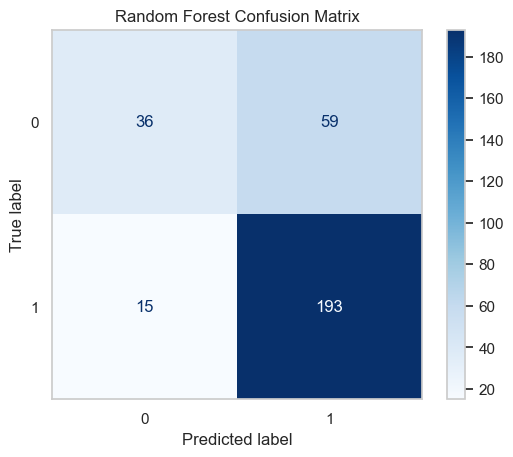

In [38]:
# Displaying the confusion matrix for visualization
conf_matrix = confusion_matrix(y_test, y_predXG)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1]).plot(cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.grid(False)
plt.show()

## GradientBoosting Model 

In [39]:
# Initialize and train GB model
Gb = HistGradientBoostingClassifier(max_iter=100).fit(X_train, y_train)

In [40]:
y_predGb = Gb.predict(X_test)

In [41]:
# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predGb))
print("\nClassification Report:\n", classification_report(y_test, y_predGb))
print("\nAccuracy Score:", accuracy_score(y_test, y_predGb))

Confusion Matrix:
 [[ 35  60]
 [ 11 197]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.37      0.50        95
           1       0.77      0.95      0.85       208

    accuracy                           0.77       303
   macro avg       0.76      0.66      0.67       303
weighted avg       0.76      0.77      0.74       303


Accuracy Score: 0.7656765676567657


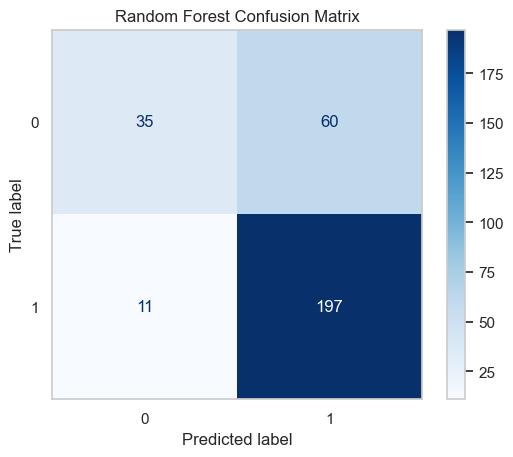

In [42]:
# Displaying the confusion matrix for visualization
conf_matrix = confusion_matrix(y_test, y_predGb)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1]).plot(cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.grid(False)
plt.show()

## AdaBoost Model

In [64]:
# Set the number of boosting iterations
n_estimators = 50 

# Initialize and train AdaBoost model
weak_learner = RandomForestClassifier(random_state=42, n_estimators=100)

adaboost_clf = AdaBoostClassifier(
    estimator=weak_learner,
    n_estimators=n_estimators,
    algorithm="SAMME",
    random_state=42,
).fit(X_train, y_train)

In [65]:
y_predAb = adaboost_clf.predict(X_test)

In [66]:
# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predAb))
print("\nClassification Report:\n", classification_report(y_test, y_predAb))
print("\nAccuracy Score:", accuracy_score(y_test, y_predAb))

Confusion Matrix:
 [[ 30  65]
 [  8 200]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.32      0.45        95
           1       0.75      0.96      0.85       208

    accuracy                           0.76       303
   macro avg       0.77      0.64      0.65       303
weighted avg       0.77      0.76      0.72       303


Accuracy Score: 0.759075907590759


## KNN Model 

In [67]:
from sklearn.neighbors import KNeighborsClassifier
# Train the KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)  # k = 5
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [68]:
y_predKn = knn_model.predict(X_test)

In [69]:
# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predKn))
print("\nClassification Report:\n", classification_report(y_test, y_predKn))
print("\nAccuracy Score:", accuracy_score(y_test, y_predKn))

Confusion Matrix:
 [[ 36  59]
 [ 23 185]]

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.38      0.47        95
           1       0.76      0.89      0.82       208

    accuracy                           0.73       303
   macro avg       0.68      0.63      0.64       303
weighted avg       0.71      0.73      0.71       303


Accuracy Score: 0.7293729372937293
